In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import os

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


data\Fake-Images
Image not in ext list, removing: data\Fake-Images\134.jpg
Image not in ext list, removing: data\Fake-Images\150.jpg
Image not in ext list, removing: data\Fake-Images\196.jpg
Image not in ext list, removing: data\Fake-Images\200.jpg
Image not in ext list, removing: data\Fake-Images\218.jpg
Image not in ext list, removing: data\Fake-Images\241.jpg


KeyboardInterrupt: 

In [8]:
os.getcwd()

'C:\\Users\\kumar'

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
import tensorflow as tf
import os
data = tf.keras.utils.image_dataset_from_directory('data')

Found 470 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

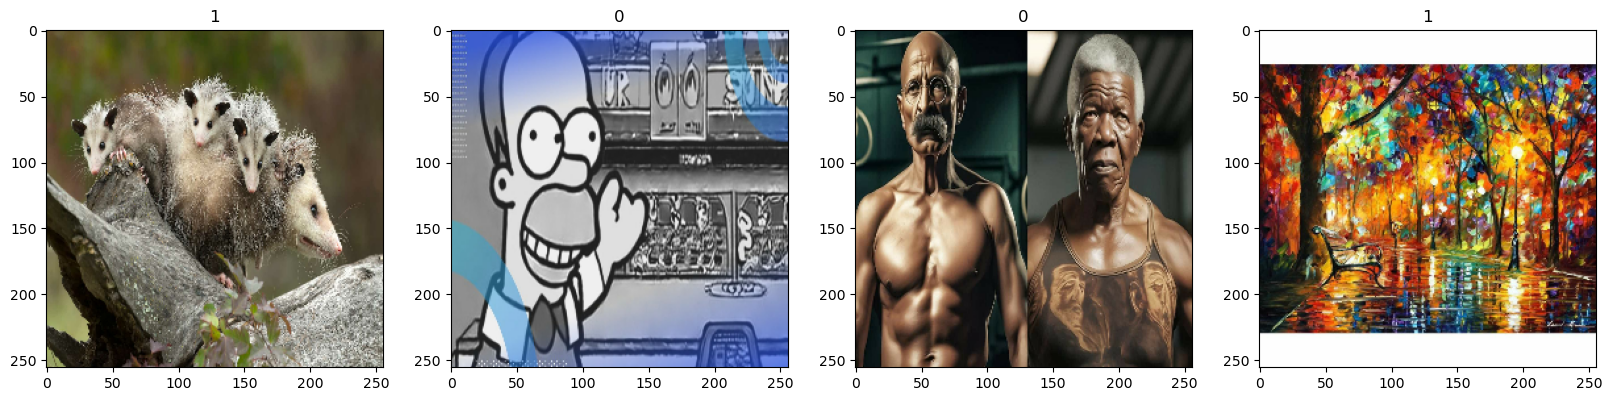

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.18431373, 0.10098039, 0.1382353 ],
          [0.08529412, 0.07647059, 0.08137255],
          [0.05588235, 0.07058824, 0.05098039],
          ...,
          [0.42745098, 0.41568628, 0.39607844],
          [0.42745098, 0.41568628, 0.39607844],
          [0.41960785, 0.40784314, 0.3882353 ]],
 
         [[0.19607843, 0.13627452, 0.14509805],
          [0.20784314, 0.20882353, 0.19411765],
          [0.3107843 , 0.31960785, 0.2901961 ],
          ...,
          [0.42745098, 0.41568628, 0.39607844],
          [0.42745098, 0.41568628, 0.39607844],
          [0.41960785, 0.40784314, 0.3882353 ]],
 
         [[0.36862746, 0.3382353 , 0.3137255 ],
          [0.2882353 , 0.3       , 0.2529412 ],
          [0.30588236, 0.30980393, 0.25784314],
          ...,
          [0.42745098, 0.41568628, 0.39607844],
          [0.42745098, 0.41568628, 0.39607844],
          [0.41960785, 0.40784314, 0.3882353 ]],
 
         ...,
 
         [[0.3372549 , 0.3529412 , 0.29411766],
          [0.35294

In [21]:
len(data)

15

In [32]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [33]:
train_size

10

In [34]:
test_size

2

In [35]:
val_size

3

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [42]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [43]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 41s 3s/step - loss: 0.7959 - accuracy: 0.6406 - val_loss: 0.6904 - val_accuracy: 0.8021
Epoch 2/20
10/10 [==============================] - 38s 3s/step - loss: 0.6876 - accuracy: 0.6906 - val_loss: 0.6558 - val_accuracy: 0.7396
Epoch 3/20
10/10 [==============================] - 38s 3s/step - loss: 0.6352 - accuracy: 0.7094 - val_loss: 0.5983 - val_accuracy: 0.6667
Epoch 4/20
10/10 [==============================] - 37s 3s/step - loss: 0.6488 - accuracy: 0.7688 - val_loss: 0.6431 - val_accuracy: 0.7604
Epoch 5/20
10/10 [==============================] - 36s 3s/step - loss: 0.6011 - accuracy: 0.7656 - val_loss: 0.4671 - val_accuracy: 0.7917
Epoch 6/20
10/10 [==============================] - 36s 3s/step - loss: 0.5696 - accuracy: 0.7344 - val_loss: 0.5562 - val_accuracy: 0.8021
Epoch 7/20
10/10 [==============================] - 37s 3s/step - loss: 0.5285 - accuracy: 0.8156 - val_loss: 0.4461 - val_accuracy: 0.8542
Epoch 8/20
10/10 [==

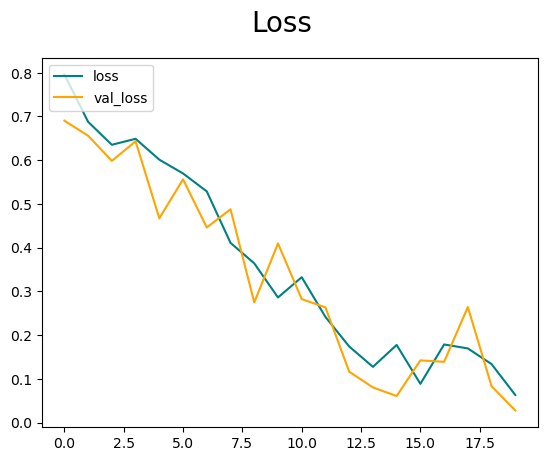

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

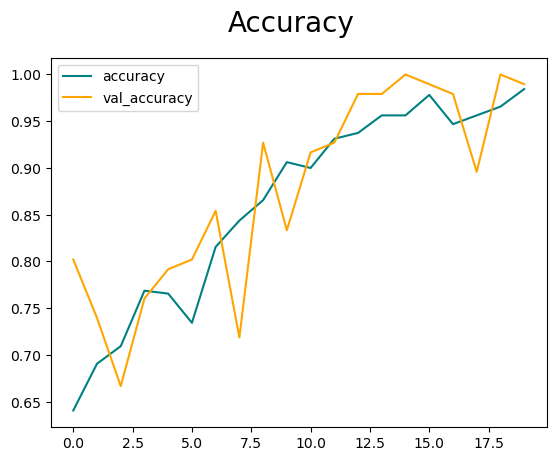

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 445ms/step


In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9736842, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9814815, shape=(), dtype=float32)
